In [15]:
!pip install pandas_datareader
!pip install matplotlib
!pip install numpy
!pip install pandas

In [16]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import datetime

In [17]:
ticker = "AAPL"

In [26]:
ohlcv = pdr.get_data_yahoo(ticker,datetime.date.today()-datetime.timedelta(364),datetime.date.today())

In [27]:
ohlcv.shape

(252, 6)

In [28]:
ohlcv.shape

(252, 6)

In [29]:
ohlcv.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-19,167.449997,159.089996,166.000000,160.889999,49047300.0,158.508408
2018-12-20,162.110001,155.300003,160.399994,156.830002,64773000.0,154.508499
2018-12-21,158.160004,149.630005,156.860001,150.729996,95744600.0,148.498795
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540


In [30]:
ohlcv.tail(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,275.149994
2019-12-16,280.790009,276.980011,277.000000,279.859985,32046500.0,279.859985
2019-12-17,281.769989,278.799988,279.570007,280.410004,28539600.0,280.410004
2019-12-18,281.899994,279.119995,279.799988,279.739990,29007100.0,279.739990


In [31]:
def RSI(DF,n):
    "function to calculate RSI"
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    return df['RSI']

In [32]:
# Calculating RSI without using loop
def rsi(df, n):
    "function to calculate RSI"
    delta = df["Adj Close"].diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[n-1]] = np.mean( u[:n] ) #first value is sum of avg gains
    u = u.drop(u.index[:(n-1)])
    d[d.index[n-1]] = np.mean( d[:n] ) #first value is sum of avg losses
    d = d.drop(d.index[:(n-1)])
    rs = pd.stats.moments.ewma(u, com=n-1, adjust=False) / \
         pd.stats.moments.ewma(d, com=n-1, adjust=False)
    return 100 - 100 / (1 + rs)

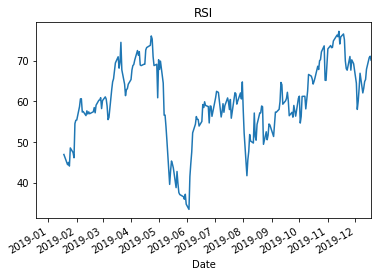

In [33]:
RSI(ohlcv,20).plot(title="RSI")